In [1]:
library(cicero)
library(Seurat)
library(Signac)
library(magrittr)
library(genomation)
library(GenomicRanges)
library(Matrix)
library(ggplot2)

Loading required package: monocle3

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading requi

Specify file path

In [2]:
# path.seurat = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/GM12878/1.prepare_data/1.seurat_pipeline.240615/obj.seurat.qc.rds"
path.matrix.atac_count = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/250319/scE2G/test/results/HCT116/HCT116/Kendall/atac_matrix.rds"
path.pairs.E2G = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/250319/scE2G/test/results/HCT116/HCT116/Kendall/Pairs.tsv.gz"
path.TSS1kb = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/240508/sc-E2G/test/results_K562_IGVF/K562/Neighborhoods//GeneList.TSS1kb.bed"
path.chrom.sizes = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/240508/sc-E2G/ENCODE_rE2G/ABC/reference/hg38/GRCh38_EBV.chrom.sizes.tsv"
dir.output = "/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/analysis/E2G_240503/data/HCT116/1.Genome_wide_prediction/Cicero/Cicero.250321/"
celltype = "HCT116"

In [3]:
distance_constraint = 1000000 
window = 2000000

Import ATAC matrix

In [4]:
matrix.atac_count = readRDS(path.matrix.atac_count)
matrix.atac = BinarizeCounts(matrix.atac_count)
rm(matrix.atac_count)

Import candidate E-G pairs

In [5]:
pairs.E2G = readGeneric(path.pairs.E2G,
                        header = T,
                        keep.all.metadata = T)

Import TSS1kb regions

In [6]:
bed.TSS1kb = readGeneric(path.TSS1kb,
                         header = F,
                         keep.all.metadata = T)
bed.TSS1kb

GRanges object with 20666 ranges and 3 metadata columns:
          seqnames            ranges strand |          V4        V5          V6
             <Rle>         <IRanges>  <Rle> | <character> <integer> <character>
      [1]     chr1       35581-36581      * |     FAM138A         0           -
      [2]     chr1       35581-36581      * |     FAM138F         0           -
      [3]     chr1       68590-69590      * |       OR4F5         0           +
      [4]     chr1     816870-817870      * |      FAM87B         0           +
      [5]     chr1     827022-828022      * |   LINC00115         0           -
      ...      ...               ...    ... .         ...       ...         ...
  [20662]     chrY 21385860-21386860      * |       PRORY         0           -
  [20663]     chrY 21594166-21595166      * |      TTTY13         0           -
  [20664]     chrY 22298376-22299376      * |       TTTY5         0           -
  [20665]     chrY 23198592-23199592      * |        DAZ1      

Create a Cicero CDS

In [7]:
peakinfo = do.call(rbind,
                   strsplit(rownames(matrix.atac),"-"))
peakinfo = as.data.frame(peakinfo)
names(peakinfo) <- c("chr", "bp1", "bp2")
peakinfo$site_name <- paste(peakinfo$chr, peakinfo$bp1, peakinfo$bp2, sep="-")
row.names(peakinfo) <- peakinfo$site_name                   
peakinfo

,chr,bp1,bp2,site_name
,<chr>,<chr>,<chr>,<chr>
chr1-100034595-100034763,chr1,100034595,100034763,chr1-100034595-100034763
chr1-100037727-100038876,chr1,100037727,100038876,chr1-100037727-100038876
chr1-100046025-100046641,chr1,100046025,100046641,chr1-100046025-100046641
chr1-100132492-100133481,chr1,100132492,100133481,chr1-100132492-100133481
chr1-1001789-1002120,chr1,1001789,1002120,chr1-1001789-1002120
chr1-100249522-100250262,chr1,100249522,100250262,chr1-100249522-100250262
chr1-100265698-100266871,chr1,100265698,100266871,chr1-100265698-100266871
chr1-100320149-100320667,chr1,100320149,100320667,chr1-100320149-100320667
chr1-10032466-10033534,chr1,10032466,10033534,chr1-10032466-10033534


In [8]:
input_cds <-  suppressWarnings(new_cell_data_set(matrix.atac,
                               # cell_metadata = cellinfo,
                               gene_metadata = peakinfo))

In [9]:
input_cds <- monocle3::detect_genes(input_cds)
#Ensure there are no peaks included with zero reads
input_cds <- input_cds[Matrix::rowSums(exprs(input_cds)) != 0,] 

In [10]:
set.seed(2017)
input_cds <- detect_genes(input_cds)
input_cds <- estimate_size_factors(input_cds)
input_cds <- preprocess_cds(input_cds, method = "LSI")
input_cds <- reduce_dimension(input_cds, reduction_method = 'UMAP', 
                              preprocess_method = "LSI")

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'



No trajectory to plot. Has learn_graph() been called yet?

cluster not found in colData(cds), cells will not be colored

cluster_cells() has not been called yet, can't color cells by cluster



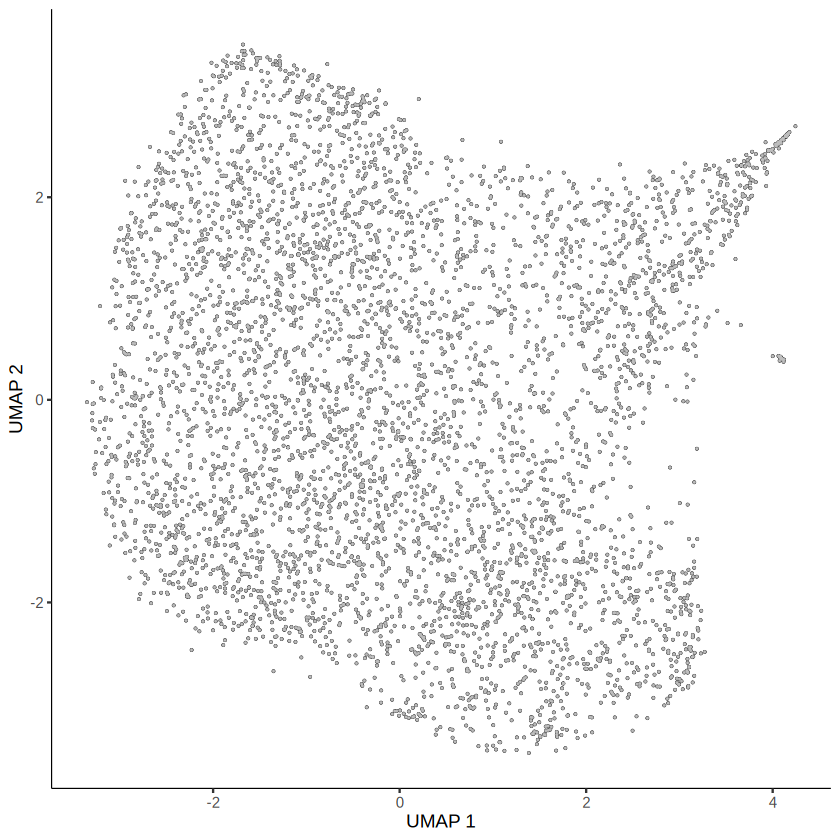

In [11]:
plot_cells(input_cds)

In [12]:
umap_coords <- reducedDims(input_cds)$UMAP
cicero_cds <- make_cicero_cds(input_cds, reduced_coordinates = umap_coords)

Overlap QC metrics:
Cells per bin: 50
Maximum shared cells bin-bin: 44
Mean shared cells bin-bin: 0.527037471331517
Median shared cells bin-bin: 0



Run Cicero

In [13]:
human.hg38.genome = read.table(path.chrom.sizes,
                               header = F)
human.hg38.genome

V1,V2
<chr>,<int>
chr1,248956422
chr2,242193529
chr3,198295559
chr4,190214555
chr5,181538259
chr6,170805979
chr7,159345973
chr8,145138636
chr9,138394717


In [14]:
start_time <- Sys.time()
distance_parameters <- estimate_distance_parameter(cicero_cds, 
                                                   window = window, 
                                                   maxit = 100, 
                                                   sample_num = 100, 
                                                   distance_constraint = distance_constraint,
                                                   distance_parameter_convergence = 1e-22, 
                                                   genomic_coords = human.hg38.genome)
mean_distance_parameter <- mean(unlist(distance_parameters))
end_time <- Sys.time()
execution_time1 <- end_time - start_time

In [15]:
mean_distance_parameter

[1] 0.1473363

In [16]:
execution_time1

Time difference of 6.318823 mins

In [17]:
start_time <- Sys.time()
cicero_out <- generate_cicero_models(cicero_cds, 
                                     distance_parameter = mean_distance_parameter, 
                                     window = window, 
                                     genomic_coords = human.hg38.genome)
end_time <- Sys.time()
execution_time2 <- end_time - start_time

In [18]:
execution_time2

Time difference of 43.80958 mins

In [19]:
start_time <- Sys.time()
all_cons <- assemble_connections(cicero_out, 
                                 silent = FALSE)
end_time <- Sys.time()
execution_time3 <- end_time - start_time

[1] "Successful cicero models:  2318"
[1] "Other models: "

  Too many elements in range Zero or one element in range 
                         445                          821 
[1] "Models with errors:  0"


In [20]:
execution_time3

Time difference of 1.018359 mins

Assign coaccess to E2G pairs

In [21]:
all_cons0 = all_cons
all_cons0[is.na(all_cons0[,"coaccess"]),"coaccess"] = 0
bed.peakinfo <- makeGRangesFromDataFrame(peakinfo, 
                                         keep.extra.columns = TRUE,
                                         start.field="bp1",
                                         end.field="bp2")
overlap.res = findOverlaps(bed.peakinfo[all_cons0[,"Peak1"]],
                           bed.TSS1kb)
df.overlap = as.data.frame(overlap.res)
all_cons0.E2G = all_cons0[df.overlap$queryHits,]
all_cons0.E2G[,"Gene"] = bed.TSS1kb[df.overlap$subjectHits]$V4
all_cons0.E2G[,"PairName"] = paste(all_cons0.E2G[,"Peak2"],all_cons0.E2G[,"Gene"],sep = "_")
all_cons0.E2G.sort = all_cons0.E2G[order(all_cons0.E2G[,"coaccess"],decreasing = T),]
all_cons0.E2G.uniq = all_cons0.E2G.sort[!duplicated(all_cons0.E2G.sort$PairName),]
rownames(all_cons0.E2G.uniq) = all_cons0.E2G.uniq$PairName
pairs.E2G.res = pairs.E2G[pairs.E2G$PairName %in% all_cons0.E2G.uniq$PairName]
pairs.E2G.res$coaccess = all_cons0.E2G.uniq[pairs.E2G.res$PairName,"coaccess"]

Save results

In [22]:
dir.create(dir.output,recursive = T)
saveRDS(all_cons,
        paste(dir.output,"all_cons.rds",sep = "/"))
saveRDS(pairs.E2G.res,
        paste(dir.output,"pairs.E2G.res.rds",sep = "/"))
df.output = as.data.frame(pairs.E2G.res,row.names = NULL)
colnames(df.output)[1] = "chr"
df.output[,"CellType"] = celltype
df.output = df.output[,c("chr",
                         "start",
                         "end",
                         "TargetGene",
                         "CellType",
                         "coaccess")]
data.table::fwrite(df.output,
                   file = paste(dir.output,"pairs.E2G.res.tsv.gz",sep = "/"),
                   row.names = F,
                   quote = F,
                   sep = "\t")
pairs.E2G.res
df.output

GRanges object with 1281142 ranges and 4 metadata columns:
            seqnames              ranges strand |  TargetGene
               <Rle>           <IRanges>  <Rle> | <character>
        [1]     chr1 100034595-100034763      * |         AGL
        [2]     chr1 100034595-100034763      * |      CDC14A
        [3]     chr1 100034595-100034763      * |         DBT
        [4]     chr1 100034595-100034763      * |        DPH5
        [5]     chr1 100034595-100034763      * |       EXTL2
        ...      ...                 ...    ... .         ...
  [1281138]     chrX     9995795-9996095      * |       ANOS1
  [1281139]     chrX     9995795-9996095      * |       CLCN4
  [1281140]     chrX     9995795-9996095      * |       FAM9B
  [1281141]     chrX     9995795-9996095      * |       TBL1X
  [1281142]     chrX     9995795-9996095      * |        WWC3
                          PeakName               PairName     coaccess
                       <character>            <character>    <nu

chr,start,end,TargetGene,CellType,coaccess
<fct>,<int>,<int>,<chr>,<chr>,<dbl>
chr1,100034595,100034763,AGL,HCT116,-0.0009344919
chr1,100034595,100034763,CDC14A,HCT116,-0.0003259173
chr1,100034595,100034763,DBT,HCT116,0.0018541773
chr1,100034595,100034763,DPH5,HCT116,0.0009635831
chr1,100034595,100034763,EXTL2,HCT116,0.0038002140
chr1,100034595,100034763,FRRS1,HCT116,0.0014549689
chr1,100034595,100034763,MFSD14A,HCT116,-0.0001551590
chr1,100034595,100034763,PLPPR4,HCT116,0.0218986464
chr1,100034595,100034763,RTCA,HCT116,0.0013520675


In [23]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggplot2_3.5.1               Matrix_1.6-5               
 [3] genomation_1.34.0           magrittr_2.0.3             
 [5] Signac_